In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm as cmc
import matplotlib as mpl
import pandas as pd
import xarray as xr

import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')


import ml_estimation as ml
import model1_plots as mp
import Utilities as util

In [ ]:
model = 1
method = 'standard' # model3: 'standard' or 'compl'
start_image = 'scene'  # 'constant' or 'scene'
mask = 'mask_low_prob' # '' or 'mask_low_prob'
cf = False
if model == 0:
    x = xr.open_dataset("../data/simulation/model1/sim_n=37_441x322_cf.nc")
    loc = '../fig/model0/'
elif model == 1:
    x = xr.open_dataset("../data/simulation/model1/sim_n=37_441x322_cf.nc")
    loc = '../fig/model1/'
elif (model == 2) & (method == 'standard'):
    x = xr.open_dataset('../data/simulation/model2/simulation2_standard_T30_N20_cf')
    loc = '../fig/model2/'
elif (model == 2) & (method == 'main_beta'):
    x = xr.open_dataset('../mod/model2/sim/simulation2_main_beta_T30_N20_cf')
    loc = '../fig/model2/main_beta'
elif (model == 2) & (method == 'main_beta_8'):
    x = xr.open_dataset('../mod/model2/sim/simulation2_main_beta_8_T30_N20')
    loc = '../fig/model2/main_beta_8'
elif (model == 3) & (cf):
    x = xr.open_dataset('../data/simulation/model3/simulation3_T30_cf')
    loc = '../fig/model3/'
elif (model == 3):
    x = xr.open_dataset(f'../data/simulation/model3/simulation3_T100_{method}_startimage_{start_image}_{mask}')
    loc = f'../fig/model3/T100_{method}_startimage_{start_image}_{mask}_'



if model != 3:
    x['z'] = x.z.astype(bool)
    x['ct'][:] = util.classISCCP(np.exp(x.d), x.h)
    x['ct'][:] = x.ct.where(~x.z, 1)
    
# x.h.where(x.h > 0).plot(x = 'i', y = 'j', col = 't', col_wrap = 4, cmap = cm.batlow)

# plt.figure()
# plt.hist2d(x.d.data.flatten(), x.h.data.flatten(), bins = 50, range = [[-1, 5], [0, 16e3]], norm = mpl.colors.LogNorm())
# plt.show()

x = x.assign_coords(i=x.i * 1e-3, j = x.j * 1e-3)

In [3]:
loc

'../fig/model1/'

In [68]:
x

<xarray.Dataset>
Dimensions:   (classes: 11, i: 441, j: 322, t: 37)
Coordinates:
  * i         (i) float64 1.1e+03 1.095e+03 1.09e+03 ... -1.104e+03 -1.109e+03
  * j         (j) float64 1.113e+03 1.108e+03 1.103e+03 ... -489.0 -494.0 -499.0
  * t         (t) int64 0 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
Dimensions without coordinates: classes
Data variables:
    h         (t, i, j) float32 3.561e+03 2.342e+03 ... 2.178e+03 1.22e+04
    d         (t, i, j) float32 0.05102 0.3288 0.254 0.3885 ... 0.0 1.11 1.325
    ct        (t, i, j) float64 ...
    u         (t, i, j) float32 ...
    v         (t, i, j) float32 ...
    z         (t, i, j) bool False False False False ... False True False False
    cf        (t, classes) float64 ...
    sigma_cf  (t, classes) float64 ...
Attributes:
    extent:   [-50. -30.  -5.  15.]

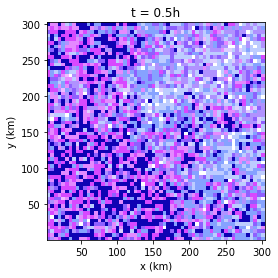

In [69]:
t = 3 #[0, 3, 6, 12, 18, 30]
N = 60 #40
g = x.ct.isel(t = t, i = abs(x.i).argmin().data - 1 - np.arange(N) ,
              j = abs(x.j).argmin().data - np.arange(N)-1 ).plot(x = 'i', y = 'j',
#                                      col = 't', 
                                   cmap = mp.cmap, 
                                    norm = mp.cmap_norm,
                                    add_colorbar = False,
                                   alpha = 1,
           
                                                                            )


g.axes.set_aspect('equal', 'box')
g.axes.set_title(f't = {t/ 6}h')
g.axes.set(xlabel = 'x (km)', ylabel = 'y (km)')

g.figure.set_size_inches(4.5, 4)


plt.savefig(loc + 'simulation_images_zoom')
plt.show()
# dir(g.figure)



In [70]:
loc

'../fig/model1/'

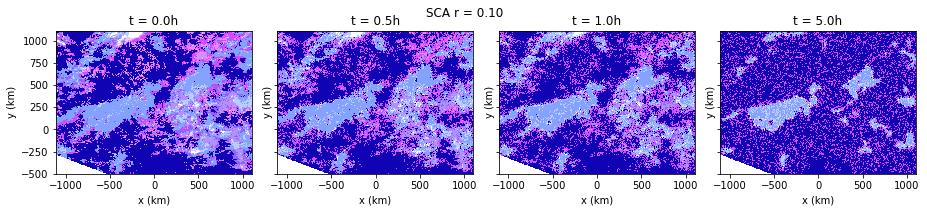

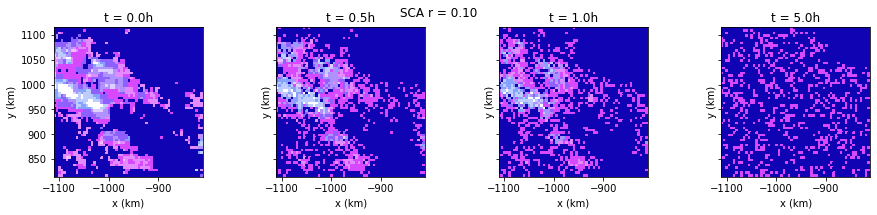

In [3]:
model_names = ['SCA r = 0.10']
model = 4

loc_sim_data = '../data/simulation/model3/simulation3_T40_standard_startimage_scene_mask_low_prob_cf'

x = xr.open_dataset(loc_sim_data)
x = x.assign_coords(i=x.i * 1e-3, j = x.j * 1e-3)
model_name = model_names[0]
loc = '../fig/results/'

t = [0, 3, 6, 30]
g = x.ct.isel(t = t).plot(x = 'i', y = 'j', col = 't', cmap = mp.cmap, 
                                      norm = mp.cmap_norm,
                                      add_colorbar = False, 
                                     alpha = 1,
#                                     aspect = 1

                                    )

for i, ax in enumerate(g.axes.flat):
    ax.set_aspect(1, 'box')
    ax.set_title(f't = {t[i]/ 6}h')
    ax.set(xlabel = 'x (km)', ylabel = 'y (km)')
#     ax.axis('equal')
plt.suptitle(model_name)
# mp.plotCT(x.ct, col = 't')

plt.savefig(loc + 'simulation_images_sequence_model' + str(model) )
plt.show()

N = 60 #40
g = x.ct.isel(t = t, i = len(x.i) - 1 - np.arange(N) , j = np.arange(N)).plot(x = 'i', y = 'j', col = 't', 
                                                                                               cmap = mp.cmap, 
                                                                                                norm = mp.cmap_norm,
                                                                                                add_colorbar = False,
                                                                                               alpha = 1,
                                                                                             )
for i, ax in enumerate(g.axes.flat):
    ax.set_aspect(1)
    ax.set_title(f't = {t[i]/ 6}h')
    ax.set(xlabel = 'x (km)', ylabel = 'y (km)')
#     ax.axis('equal')
plt.suptitle(model_name)

plt.savefig(loc + 'simulation_images_zoom_sequence_model'+ str(model))
plt.show()

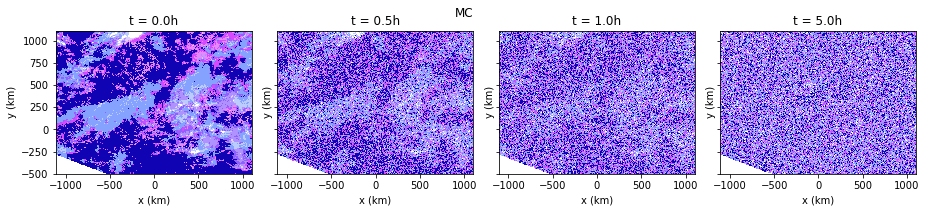

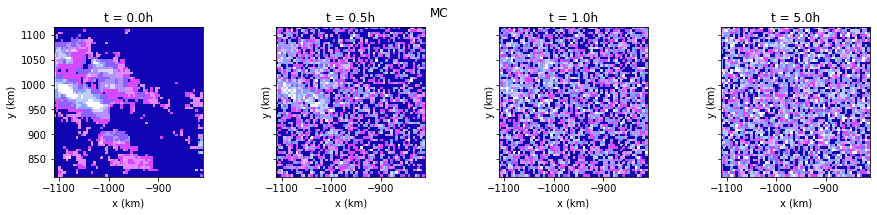

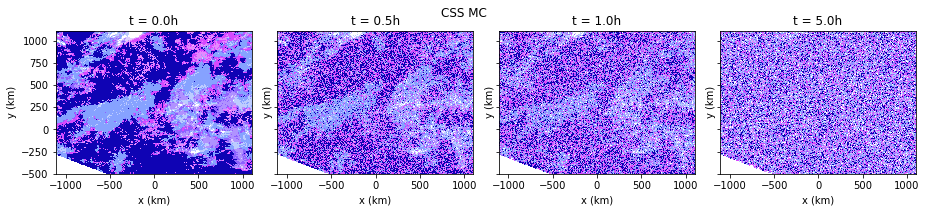

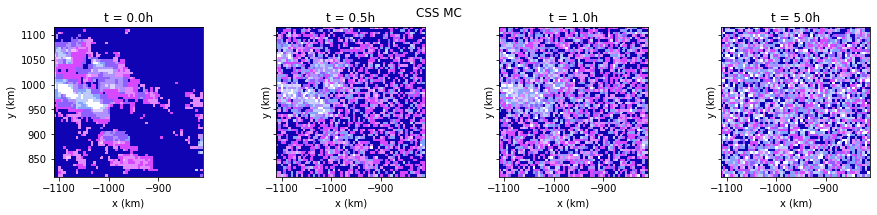

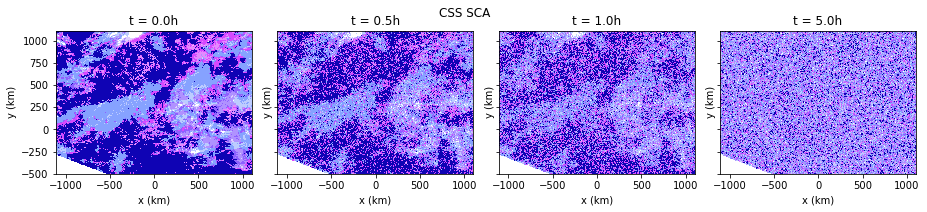

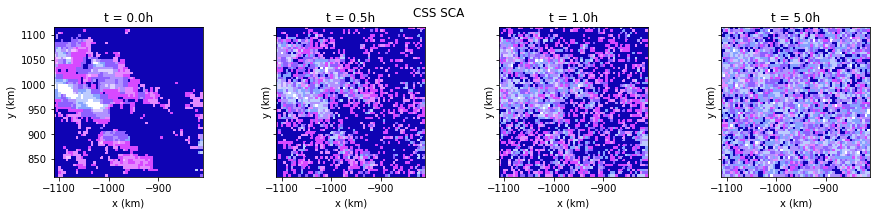

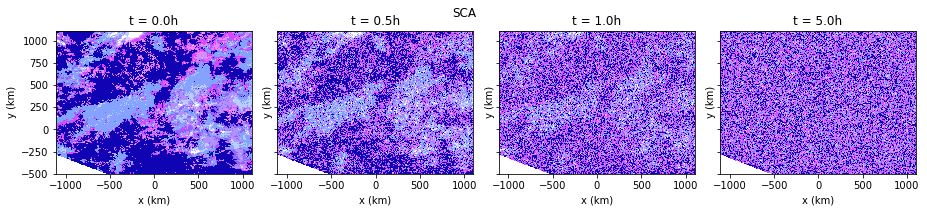

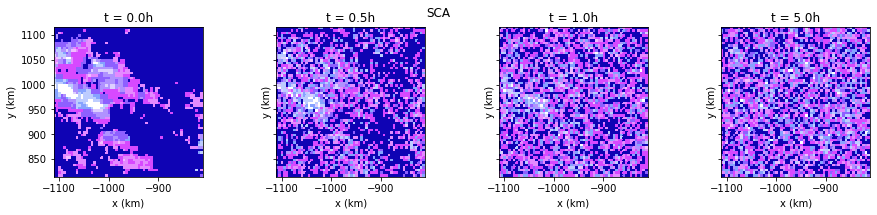

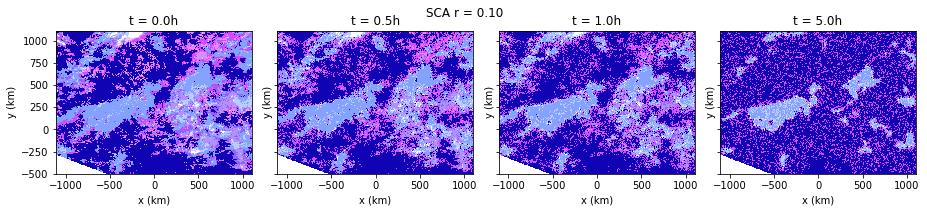

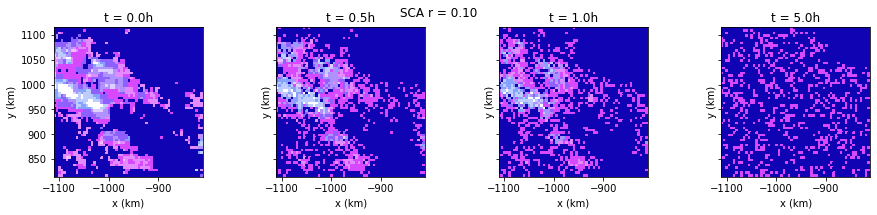

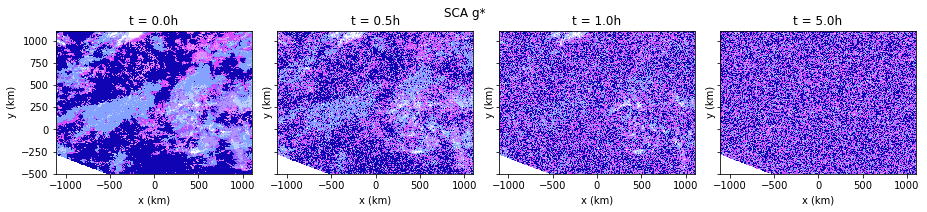

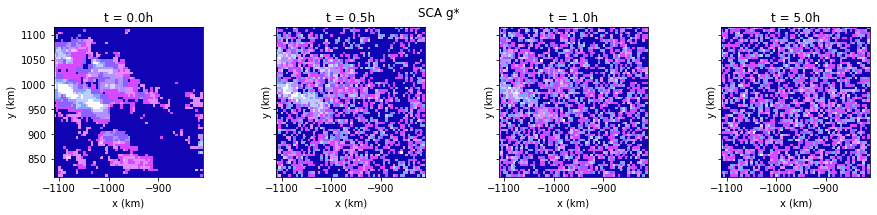

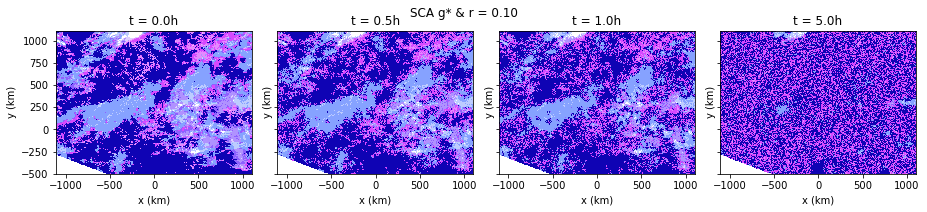

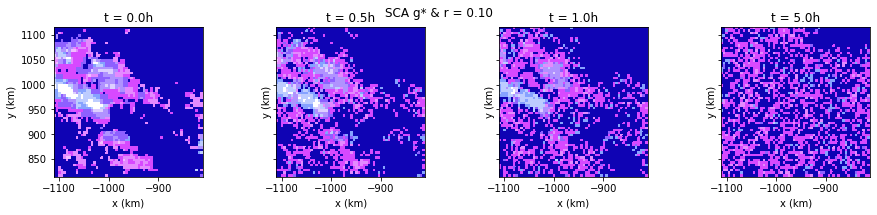

In [7]:
model_names = ['MC', 'CSS MC', 'CSS SCA', 'SCA', 'SCA r = 0.10', 'SCA g*', 'SCA g* & r = 0.10']

for model in [0, 1, 2, 3, 4, 5, 6]:
    x = xr.open_dataset(loc_sim_data[model])
    x = x.assign_coords(i=x.i * 1e-3, j = x.j * 1e-3)
    model_name = model_names[model]
    loc = '../fig/results/'
    
    t = [0, 3, 6, 30]
    g = x.ct.isel(t = t).plot(x = 'i', y = 'j', col = 't', cmap = mp.cmap, 
                                          norm = mp.cmap_norm,
                                          add_colorbar = False, 
                                         alpha = 1,
    #                                     aspect = 1

                                        )

    for i, ax in enumerate(g.axes.flat):
        ax.set_aspect(1, 'box')
        ax.set_title(f't = {t[i]/ 6}h')
        ax.set(xlabel = 'x (km)', ylabel = 'y (km)')
    #     ax.axis('equal')
    plt.suptitle(model_name)
    # mp.plotCT(x.ct, col = 't')

    plt.savefig(loc + 'simulation_images_sequence_model' + str(model) )
    plt.show()

    N = 60 #40
    g = x.ct.isel(t = t, i = len(x.i) - 1 - np.arange(N) , j = np.arange(N)).plot(x = 'i', y = 'j', col = 't', 
                                                                                                   cmap = mp.cmap, 
                                                                                                    norm = mp.cmap_norm,
                                                                                                    add_colorbar = False,
                                                                                                   alpha = 1,
                                                                                                 )
    for i, ax in enumerate(g.axes.flat):
        ax.set_aspect(1)
        ax.set_title(f't = {t[i]/ 6}h')
        ax.set(xlabel = 'x (km)', ylabel = 'y (km)')
    #     ax.axis('equal')
    plt.suptitle(model_name)
    
    plt.savefig(loc + 'simulation_images_zoom_sequence_model'+ str(model))
    plt.show()

In [7]:
np.unique(x.i.diff('i')),np.unique(x.j.diff('j'))

(array([-5019.41278409, -5019.41278409, -5019.41278409, -5019.41278409]),
 array([-5021.75763575, -5021.75763575, -5021.75763575, -5021.75763575]))

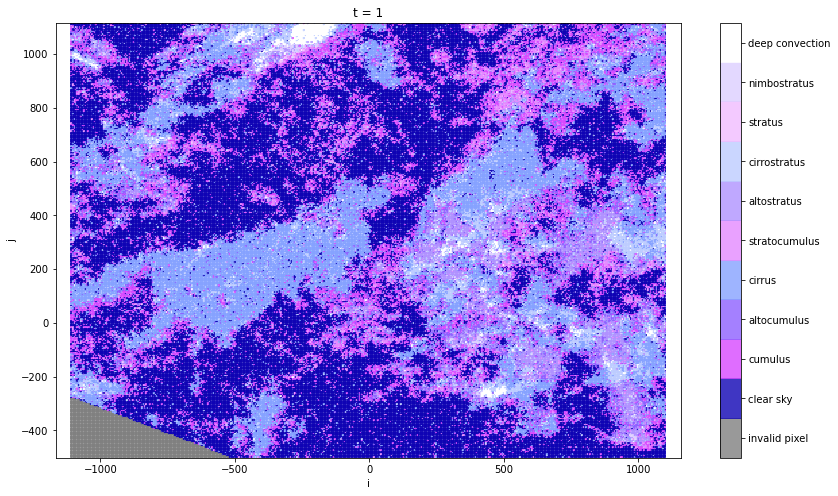

In [12]:
fig = mp.plotCT(x.ct.sel(t = 1))
plt.show()

In [13]:
bounds = np.linspace(-.5, 10.5, 12)
fig = plt.scatter(x.d.sel(t = 10), x.h.sel(t = 10), c = x.ct.sel(t = 10), vmin = 0, vmax = 10, cmap = mp.cmap)

plt.colorbar()



AttributeError: 'Dataset' object has no attribute 'd'

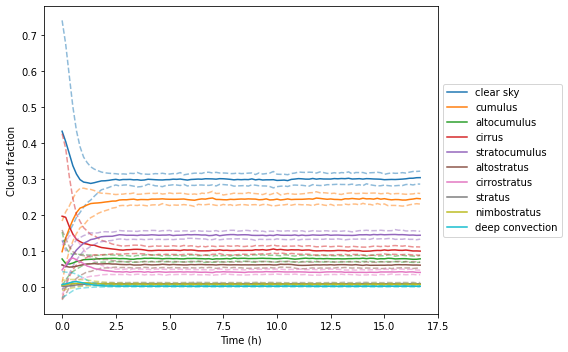

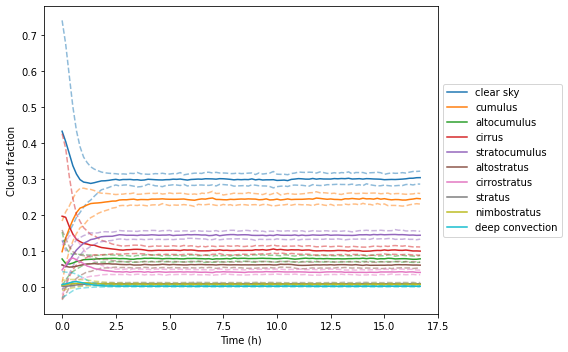

In [10]:
mp.plotCloudFrac(x, t = x.t/6)
# plt.savefig(loc + 'cloudfraction')

## Plot cloud fraction of the 4 basis models

Text(0, 0.5, 'Clear Sky Fraction SD')

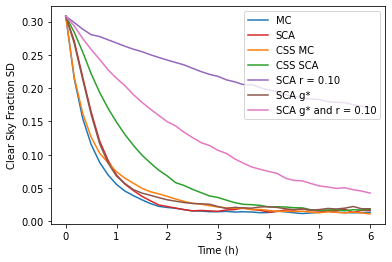

In [6]:
models = [0, 3, 1, 2, 4, 5, 6]
import matplotlib.colors as mcolors

colors =  list(mcolors.TABLEAU_COLORS.values())

name0 = '../data/simulation/model0/simulation0_T100_startimage_scene__cf'
name1 = '../data/simulation/model1/sim_n=51_441x322_cf'
name2 = '../data/simulation/model2/simulation2_standard_T50_N20_cf'
name3 = '../data/simulation/model3/simulation3_T100_standard_startimage_scene__cf'
name4 = '../data/simulation/model3/simulation3_T40_standard_startimage_scene_mask_low_prob_cf'
name5 = '../data/simulation/model3/simulation3_T40_compl_startimage_scene__cf'
name6 = '../data/simulation/model3/simulation3_T40_compl_startimage_scene_mask_low_prob_cf'


loc_sim_data = [name0, name1, name2, name3, name4, name5, name6]

for model in models:
    if model == 0:
        x = xr.open_dataset('../data/simulation/model0/simulation0_T100_startimage_scene__cf')
        model_name = 'MC'
    elif model == 1:
        x = xr.open_dataset("../data/simulation/model1/sim_n=51_441x322_cf")
        model_name = 'CSS MC'
    elif (model == 2):
        x = xr.open_dataset('../data/simulation/model2/simulation2_standard_T50_N20_cf')
        model_name = 'CSS SCA'
    elif (model == 3):
        x = xr.open_dataset('../data/simulation/model3/simulation3_T100_standard_startimage_scene__cf')
        model_name = 'SCA'
    elif (model == 4):
        x = xr.open_dataset(loc_sim_data[model])
        model_name = 'SCA r = 0.10'
    elif (model == 5):
        x = xr.open_dataset(loc_sim_data[model])
        model_name = 'SCA g*'
    elif (model == 6):
        x = xr.open_dataset(loc_sim_data[model])
        model_name = 'SCA g* and r = 0.10'
        
    clas = 1
    x = x.where(x.t <= 6 * 6, drop = True)
    cf =  x.sel(classes = clas).cf
    sigma_cf = x.sel(classes = clas).sigma_cf
    t = x.t/ 6
#     plt.plot(t, cf, label = model_name, c = colors[model])
    plt.plot(t, sigma_cf, label = model_name, c = colors[model])
#     plt.plot(t, cf + sigma_cf, '--', c = colors[model], alpha = .5)
#     plt.plot(t, cf - sigma_cf, '--', c = colors[model], alpha = .5)
    
#     mp.plotCloudFrac(x, t = x.t/6)
#     plt.title(model_name)
plt.legend()
plt.xlabel( 'Time (h)')
plt.ylabel( 'Clear Sky Fraction SD')
# plt.ylim([0, .4])


# loc = 
# plt.savefig(loc + 'clear_sky_fraction_var')

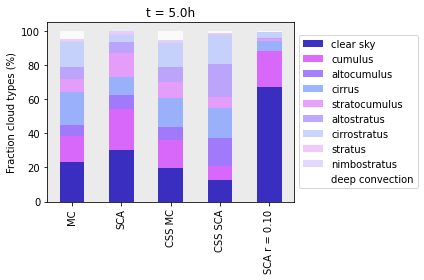

In [16]:
# model_names = ['MC', 'CSS MC', 'CSS SCA', 'SCA', 'SCA g*']
model_names = ['MC', 'CSS MC', 'CSS SCA', 'SCA', 'SCA r = 0.10', 'SCA g*', 'SCA g* & r = 0.10']

fractions = np.zeros((len(model_names), 11))
loc = '../fig/results/'
i = 0
for model in range(len(model_names)):
    x = xr.open_dataset(loc_sim_data[model])
    x = x.assign_coords(i=x.i * 1e-3, j = x.j * 1e-3)
    model_name = model_names[i]
    
    fr = x.cf.sel(t = 6 * 5)
    fractions[i,:] = fr * 100
    i += 1
df = pd.DataFrame(fractions, columns = util.ISCCP_classes.values(), index = model_names).drop(columns = 'invalid pixel')

df = df.reindex(['MC', 'SCA', 'CSS MC', 'CSS SCA',
                 'SCA r = 0.10',
#                  'SCA g*', 
#                  'SCA g* & r = 0.10'
                ])

cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in np.linspace(0, 1, 10)]

# force the first color entry to be grey
cmaplist[0] = (13/255, 0/255, 181/255, .8)

cmaplist[1] = (215/255, 73/255, 255/255, .8)
cmaplist[2] = (141/255, 96/255, 255/255, .8)
cmaplist[3] = (134/255, 162/255, 255/255, .8)

cmaplist[4] = (229/255, 138/255, 255/255, .8)
cmaplist[5] = (176/255, 146/255, 255/255, .8)
cmaplist[6] = (188/255, 204/255, 255/255, .8)

cmaplist[7] = (240/255, 188/255, 255/255, .8)
cmaplist[8] = (220/255, 206/255, 255/255, .8)
cmaplist[9] = (1, 1, 1, .8)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist)


df.plot(kind = 'bar', stacked = True, cmap = cmap )
ax = plt.gca()
ax.set_facecolor( (.9, 0.9 , .9, .8))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Fraction cloud types (%)')
plt.title('t = 5.0h')

plt.tight_layout()
plt.savefig(loc + 'Cloud type fractions at t=5h' )


In [59]:
N = 32
I = np.arange(len(x.i) // N)
J = np.arange(len(x.j) // N)
len(I), len(J)

(13, 10)

In [23]:
x

<xarray.Dataset>
Dimensions:    (classes: 11, i: 441, j: 322, n: 1, t: 101)
Coordinates:
  * i          (i) float64 1.1e+03 1.095e+03 1.09e+03 ... -1.104e+03 -1.109e+03
  * j          (j) float64 1.113e+03 1.108e+03 1.103e+03 ... -494.0 -499.0
  * t          (t) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99 100
Dimensions without coordinates: classes, n
Data variables:
    n_invalid  (t, n) int32 643 643 643 462 314 197 155 ... 92 78 93 90 80 86 93
    ct         (t, i, j) float64 ...
    z          (t, i, j) int8 ...
    cf         (t, classes) float64 0.0 0.4337 0.09909 ... 0.007909 0.002993
    sigma_cf   (t, classes) float64 0.0 0.3081 0.08518 ... 0.002807 0.001781
Attributes:
    extent:   [-50. -30.  -5.  15.]

In [5]:

hlim = [0, 16] #km
dlim = [-1.5, 5.1] #log (d)

def plotCloudHist(d, h,
                                 title = None, 
                                 mixture = False,
                                 ML = True,
                                 cmap = cmc.batlow,
                                 **kwargs):
    fig, ax = plt.subplots(1,3,figsize = (20, 4))
    # histograms
    ax[0].hist(h, density = True, color = cmap(0), **kwargs)
    ax[1].hist(d, density = True, color = cmap(0), **kwargs)
    h = ax[2].hist2d(d, h, density = True, cmap = cmap, norm=mpl.colors.LogNorm(), **kwargs)
    
    # titles etc.
    ax[0].set_xlabel('CTH (km)')
#     dh = hedges[1] - hedges[0]
#     max_h = (freq.sum(axis = 0) /  (freq.sum(axis = 0).sum() * dh * 1e-3)).max()
#     ax[0].set_ylim([0, max_h + .1])
    ax[0].set_xlim(hlim)
    ax[1].set_xlabel('log COD ($\cdot$)')
    ax[1].set_xlim(dlim)
    
    # joint density
    ax[2].set_xlabel('log COD ($\cdot$)')
    ax[2].set_ylabel('CTH (km)')
    ax[2].set_xlim(dlim)
    ax[2].set_ylim(hlim)
    plt.colorbar(h[3], ax=ax[2])

    # ax[2].set_colorbar()
    
    if title != None:
        fig.suptitle(title)
    return fig, ax

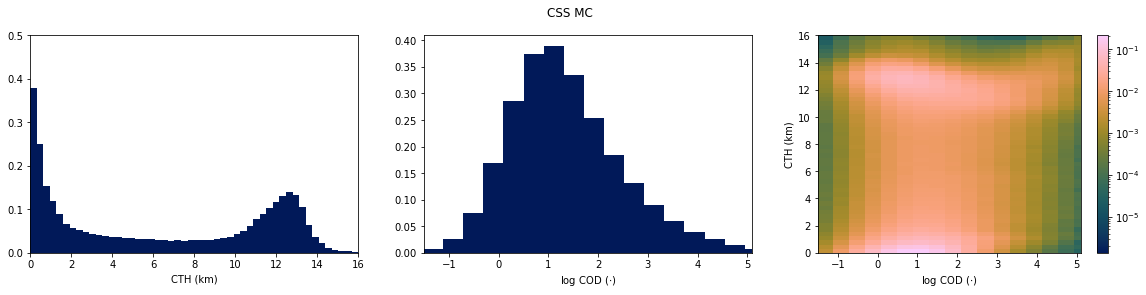

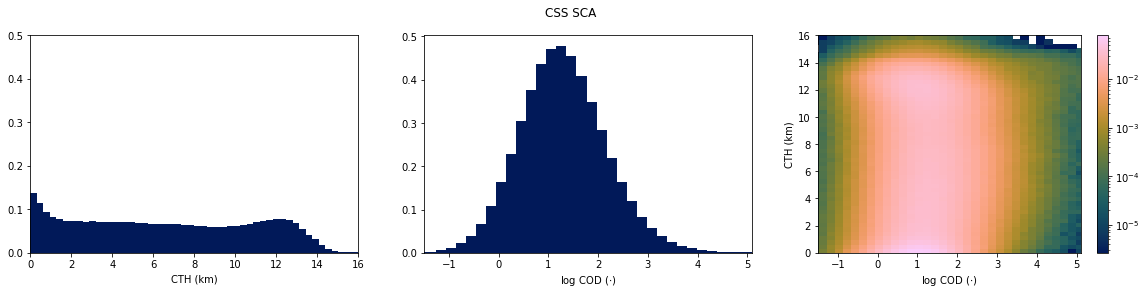

In [7]:
model_names = ['MC', 'CSS MC', 'CSS SCA', 'SCA']

for model in [1,2]:
    x = xr.open_dataset(loc_sim_data[model])
    model_name = model_names[model]



    z = x.z.data.flatten().astype(bool)

    fig, ax = plotCloudHist(x.d.data.flatten()[~z], x.h.data.flatten()[~z] * 1e-3, bins = 50)
    ax[0].set_ylim([0,.5])
    fig.suptitle(model_name)
    plt.show()
# plt.savefig(loc + 'simulation_cloud_distr')

In [80]:
loc

'../fig/model2/'

In [68]:
# z = x.z.data.flatten()

# freq, dedges, hedges = np.histogram2d(x.d.data.flatten()[~z], x.h.data.flatten()[~z] * 1e-3, bins = 50, density = True)

# fig, ax = mp.plotCloudHist_f(dedges, hedges * 1e3, freq)
# ax[0].set_ylim([0,1])

# plt.savefig(loc + 'simulation_cloud_distr')

In [47]:
n = 10000
df = pd.read_csv(f'../data/simulation/model1/sim_n={n}.csv') # check whether this is the correct simulation output
df_cc = df.dropna()


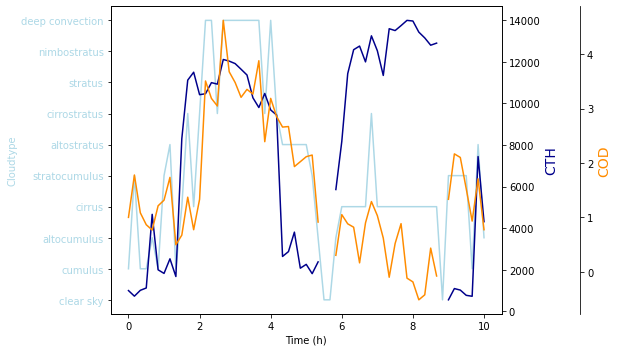

In [16]:
# plt.plot(df.loc[:100,'ISCCP'])
# df.cloud.unique()
levels = np.arange(11)

n = 60
t = np.arange(n + 1) / 6 # hours
one_pixel = df.loc[:n,'ISCCP']
fig, ax = plt.subplots(figsize = (9, 5))
plt.plot(t, one_pixel, color = 'lightblue')
plt.yticks(levels[1:], labels = list(util.ISCCP_classes.values())[1:], color = 'lightblue')
plt.ylabel('Cloudtype', color = 'lightblue')

ax2=ax.twinx()
ax2.plot(t, df.loc[:n,'h_t'],color="darkblue")
ax2.set_ylabel("CTH",color="darkblue",fontsize=14)

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes',1.20))
ax3.plot(t, df.loc[:n,'d_t'],color="darkorange")
ax3.set_ylabel("COD",color="darkorange",fontsize=14)


ax.set_xlabel('Time (h)')
plt.tight_layout()
plt.savefig('../fig/model1/one_pixel_path')
plt.show()


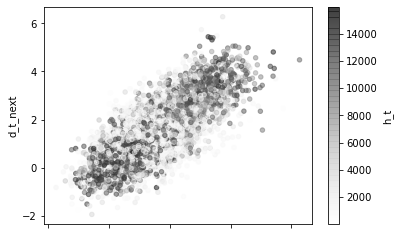

In [17]:
df_cc.plot.scatter('d_t', 'd_t_next', alpha = .5, c = 'h_t')

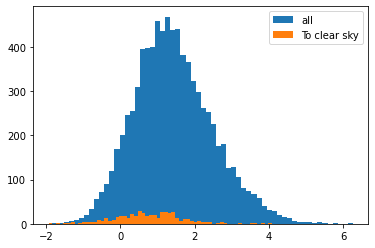

In [18]:
plt.hist(df.loc[:,'d_t'], bins = 60, label = 'all')
plt.hist(df.loc[df.cloud_next == 'clear sky'].d_t, bins = 60, label = 'To clear sky')
plt.legend()


In [19]:
pd.crosstab(df.cloud, df.cloud_next, rownames=['from'], colnames=[ 'to'], margins = True, normalize = 'index')

to,clear sky,cloud
from,,
clear sky,0.717340,0.282660
cloud,0.057246,0.942754
All,0.168417,0.831583


Text(0.5, 0, 'd')

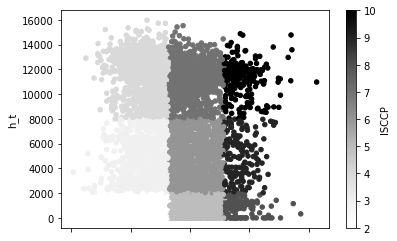

In [20]:
df.plot.scatter('d_t', 'h_t', c = 'ISCCP')
plt.xlabel('d')

to,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
from,,,,,,,,,,
1.0,0.717340,0.175178,0.016033,0.022565,0.054038,0.005938,0.008314,0.000594,0.000000,0.000000
2.0,0.149851,0.408955,0.108657,0.031642,0.237015,0.044179,0.016119,0.002985,0.000597,0.000000
3.0,0.055825,0.212379,0.317961,0.138350,0.091019,0.143204,0.037621,0.001214,0.002427,0.000000
4.0,0.036755,0.024965,0.088766,0.660888,0.003467,0.018031,0.167129,0.000000,0.000000,0.000000
5.0,0.063125,0.261875,0.038750,0.006250,0.490000,0.083750,0.010625,0.039375,0.006250,0.000000
6.0,0.012000,0.052000,0.128000,0.021000,0.147000,0.477000,0.077000,0.014000,0.064000,0.008000
7.0,0.006531,0.001633,0.025306,0.206531,0.008163,0.067755,0.603265,0.001633,0.004082,0.075102
8.0,0.036232,0.065217,0.014493,0.000000,0.579710,0.079710,0.000000,0.181159,0.043478,0.000000
9.0,0.000000,0.006211,0.018634,0.000000,0.037267,0.385093,0.080745,0.043478,0.391304,0.037267


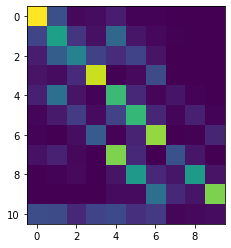

In [21]:
T_total = pd.crosstab(df.ISCCP, df.ISCCP_next, rownames=['from'], colnames=[ 'to'], normalize = 'index', margins = True)
T = T_total.iloc[:-1]
plt.imshow(T_total)
T.columns, T.index = T.columns.astype(int), T.index.astype(int)
T_total


In [77]:
util.ISCCP_classes

T.rename(columns = util.ISCCP_classes, index = util.ISCCP_classes)
imshow(T)

to,clear sky,cumulus,altocumulus,cirrus,stratocumulus,altostratus,cirrostratus,stratus,nimbostratus,deep convection
from,,,,,,,,,,
clear sky,0.798796,0.036968,0.039415,0.006434,0.049439,0.049137,0.009103,0.004814,0.005243,0.000651
cumulus,0.451096,0.273693,0.056661,0.035413,0.133895,0.026476,0.015346,0.005565,0.001349,0.000506
altocumulus,0.450127,0.052152,0.225148,0.082869,0.025823,0.121013,0.036118,0.001519,0.003544,0.001688
cirrus,0.461458,0.006657,0.067624,0.313245,0.002803,0.026279,0.120182,0.000000,0.001051,0.000701
stratocumulus,0.293296,0.183528,0.037619,0.009136,0.326750,0.067849,0.012764,0.055085,0.011958,0.002015
altostratus,0.292482,0.026777,0.144954,0.035530,0.050721,0.304454,0.078656,0.006050,0.048275,0.012101
cirrostratus,0.296101,0.000790,0.028714,0.128030,0.000790,0.074289,0.395943,0.000000,0.012908,0.062434
stratus,0.131059,0.062837,0.011670,0.000000,0.442549,0.070018,0.002693,0.236086,0.042190,0.000898
nimbostratus,0.124539,0.002948,0.036846,0.008106,0.039794,0.349300,0.061164,0.036109,0.289609,0.051584


In [9]:
T_total = pd.crosstab(df.cloud, df.cloud_next, rownames=['from'], colnames=[ 'to'], normalize = 'index', margins = True)
# T = T_total.iloc[:-1]
# plt.imshow(T_total)
# T.columns, T.index = T.columns.astype(int), T.index.astype(int)
T_total


to,clear sky,cloud
from,,
clear sky,0.798796,0.201204
cloud,0.341835,0.658165
All,0.629476,0.370524
